# **Import Package**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
warnings.filterwarnings("ignore")
import seaborn as sns
from keras.optimizers import Adam

# **Load Data**

In [11]:
df=pd.read_csv("AIML Dataset.csv")

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# **Modeling Data**

In [23]:
df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1, inplace=True)

In [24]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [25]:
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [26]:
# Normalisasi fitur numerik
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop("isFraud", axis=1)), columns=df.drop("isFraud", axis=1).columns)

In [27]:
df_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.75,0.000106,0.002855,0.003233,0.000000,0.0
1,0.0,0.75,0.000020,0.000357,0.000391,0.000000,0.0
2,0.0,1.00,0.000002,0.000003,0.000000,0.000000,0.0
3,0.0,0.25,0.000002,0.000003,0.000000,0.000059,0.0
4,0.0,0.75,0.000126,0.000697,0.000603,0.000000,0.0


In [48]:
# Tambahkan isFraud kembali, untuk nanti testing
df_scaled["isFraud"] = df["isFraud"].values
df_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.0,0.75,0.000106,0.002855,0.003233,0.000000,0.0,0
1,0.0,0.75,0.000020,0.000357,0.000391,0.000000,0.0,0
2,0.0,1.00,0.000002,0.000003,0.000000,0.000000,0.0,1
3,0.0,0.25,0.000002,0.000003,0.000000,0.000059,0.0,1
4,0.0,0.75,0.000126,0.000697,0.000603,0.000000,0.0,0


In [42]:
# Pisahkan data normal (non-fraud)
df_train = df_scaled[df_scaled["isFraud"] == 0].drop("isFraud", axis=1)
df_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.75,0.000106,0.002855,0.003233,0.0,0.0
1,0.0,0.75,0.000020,0.000357,0.000391,0.0,0.0
4,0.0,0.75,0.000126,0.000697,0.000603,0.0,0.0
5,0.0,0.75,0.000085,0.000904,0.000929,0.0,0.0
6,0.0,0.75,0.000077,0.003075,0.003551,0.0,0.0


In [47]:
df_train.count()

step              6354407
type              6354407
amount            6354407
oldbalanceOrg     6354407
newbalanceOrig    6354407
oldbalanceDest    6354407
newbalanceDest    6354407
dtype: int64

In [51]:
# Data untuk test (semua)
df_test = df_scaled.drop("isFraud", axis=1)
df_test.head()
df_test.count()

step              6362620
type              6362620
amount            6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
oldbalanceDest    6362620
newbalanceDest    6362620
dtype: int64

# **training**

In [32]:
input_dim = df_train.shape[1]

# Build Autoencoder
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),  # Bottleneck
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

In [50]:
# Compile model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train model
history = autoencoder.fit(df_train, df_train,
                          epochs=30,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1)

Epoch 1/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 4.6767e-06 - val_loss: 7.9284e-04
Epoch 2/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 4.7384e-06 - val_loss: 8.2218e-04
Epoch 3/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 4.8219e-06 - val_loss: 8.2029e-04
Epoch 4/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 4.4586e-06 - val_loss: 8.5750e-04
Epoch 5/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 4.7769e-06 - val_loss: 8.4601e-04
Epoch 6/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 4.5631e-06 - val_loss: 8.5707e-04
Epoch 7/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 4.5928e-06 - val_loss: 8.8013e-04
Epoch 8/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 4.6601e-06 - val_loss: 8.8351e-04
Epoch 9/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 4.4643e-06 - val_loss: 8.9369e-04
Epoch 10/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 4.7356e-06 - val_loss: 8.9426e-04
Epoch 11/

# **Prediksi**

198832/198832 ━━━━━━━━━━━━━━━━━━━━ 177s 868us/step


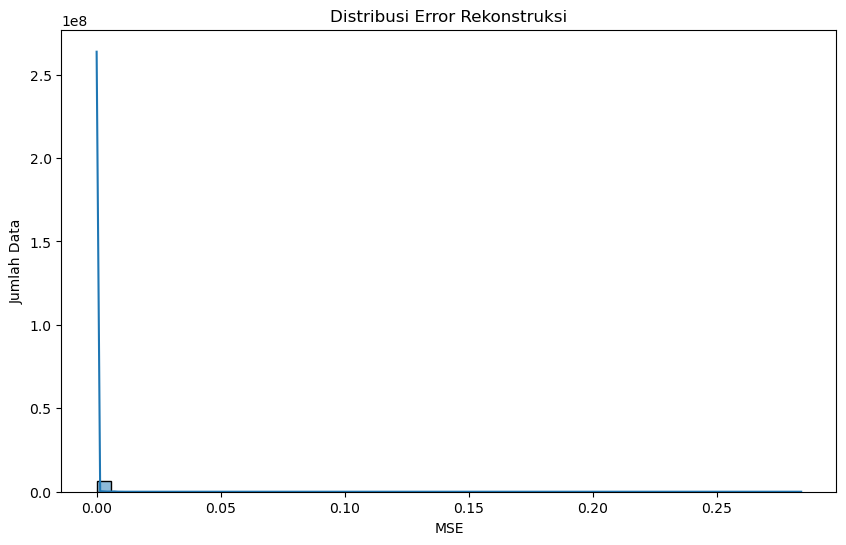

Threshold Anomali: 0.0012225584796272096


In [52]:
# Prediksi rekonstruksi data test
reconstructions = autoencoder.predict(df_test)

# Hitung MSE tiap baris
mse = np.mean(np.power(df_test - reconstructions, 2), axis=1)

# Plot distribusi error rekonstruksi
plt.figure(figsize=(10,6))
sns.histplot(mse, bins=50, kde=True)
plt.title("Distribusi Error Rekonstruksi")
plt.xlabel("MSE")
plt.ylabel("Jumlah Data")
plt.show()

# Tentukan threshold (misal percentile ke-95)
threshold = np.percentile(mse, 95)
print("Threshold Anomali:", threshold)

In [53]:
# Tandai anomaly kalau error > threshold
anomalies = mse > threshold

# Tampilkan jumlah anomaly
print("Jumlah Anomali Terdeteksi:", np.sum(anomalies))

Jumlah Anomali Terdeteksi: 318131


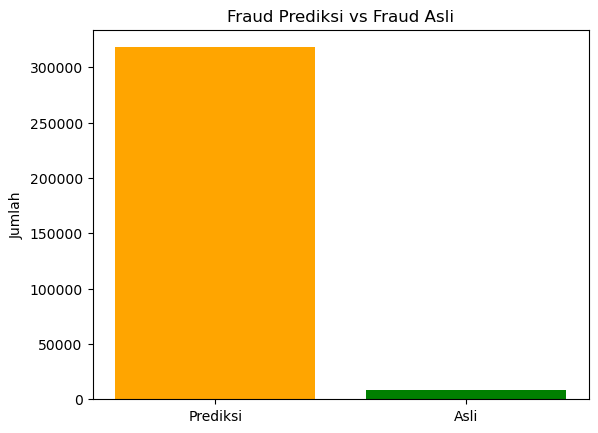

In [54]:
#perbandingan data anomali dengan data sesungguhnya
labels = ['Prediksi', 'Asli']
values = [np.sum(anomalies), (df_scaled["isFraud"]==1).sum()]

plt.bar(labels, values, color=['orange', 'green'])
plt.ylabel('Jumlah')
plt.title('Fraud Prediksi vs Fraud Asli')
plt.show()

In [ ]:
df_result = df_scaled.copy()
df_result["reconstruction_error"] = mse
df_result["is_anomaly"] = anomalies

# Lihat data anomaly saja
df_anomalies = df_result[df_result["is_anomaly"] == True]
print(df_anomalies.head())